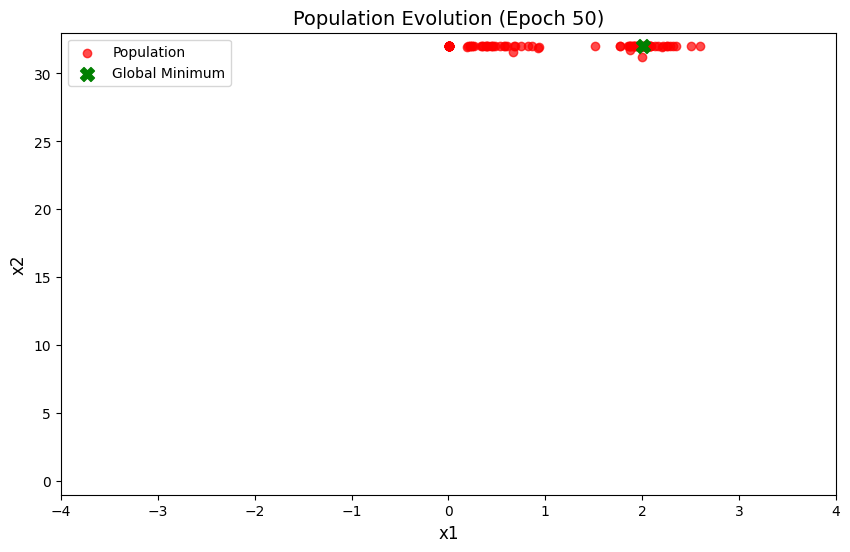

In [42]:
import numpy as np
import random as rn
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# BSA Parameters
pop_number = 100
dim = 2
pop_size = (pop_number, dim)
dim_rate = 70
low = np.array((0.01, 0.01))
high = np.array((35000, 32))
epoch = 50
globalminimum = np.zeros(epoch)

# Population generation
def population_generation(low, high, pop_size):
    return np.random.uniform(low, high, pop_size)

# Boundary control
def Boundary_control(offsprings, low, high):
    for i in range(pop_number):
        for j in range(dim):
            k = rn.random() < rn.random()
            if offsprings[i][j] < low[j]:
                offsprings[i][j] = low[j] if k else np.random.uniform(low[j], high[j])
            if offsprings[i][j] > high[j]:
                offsprings[i][j] = high[j] if k else np.random.uniform(low[j], high[j])
    return offsprings

# Objective function
def par(offsprings):
    return np.array([pow((offsprings[i][0] - 2), 2) - offsprings[i][1] + 5 for i in range(pop_number)])

# Initialization
pop = population_generation(low, high, pop_size)
fitness_pop = par(pop)
historical_pop = population_generation(low, high, pop_size)

# Store populations for animation
populations = []

# BSA Main Loop
for epk in range(epoch):
    # Selection 1
    if rn.random() < rn.random():
        historical_pop = pop
    historical_pop = historical_pop[np.random.permutation(pop_number), :]

    # Recombination (Mutation + Crossover)
    F = 3 * np.random.randn()
    map = np.zeros((pop_number, dim), dtype=int)
    if rn.random() < rn.random():
        for i in range(pop_number):
            u = np.random.permutation(dim)
            map[i][u[:math.ceil(dim_rate * rn.random() * dim)]] = 1
    else:
        for i in range(pop_number):
            map[i][rn.randrange(dim)] = 1

    offsprings = pop + (map * F) * (historical_pop - pop)

    # Call boundary control
    offsprings = Boundary_control(offsprings, low, high)

    # Selection 2
    fitness_offsprings = par(offsprings)
    better_indices = fitness_offsprings < fitness_pop
    fitness_pop[better_indices] = fitness_offsprings[better_indices]
    pop[better_indices, :] = offsprings[better_indices, :]

    # Update global minimum and minimizer
    best_index = np.argmin(fitness_pop)
    globalminimum[epk] = fitness_pop[best_index]
    globalminimizer = pop[best_index, :]

    # Store population for animation
    populations.append(pop.copy())

# Create animation with zoomed-in region
fig, ax = plt.subplots(figsize=(10, 6))

# Zoomed-in axis limits
x_min, x_max = -4, 4  # Focus on x1 values
y_min, y_max = -1, 33  # Focus on x2 values
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)
ax.set_title("Population Evolution Over Epochs (Zoomed In)", fontsize=14)
ax.set_xlabel("x1", fontsize=12)
ax.set_ylabel("x2", fontsize=12)

# Scatter plot for population
scatter = ax.scatter([], [], c='r', label='Population', alpha=0.7)
global_min_point = ax.scatter(globalminimizer[0], globalminimizer[1], c='g', s=100, marker='X', label='Global Minimum')

ax.legend()

# Update function for animation
def update(frame):
    scatter.set_offsets(populations[frame])  # Update population positions
    ax.set_title(f"Population Evolution (Epoch {frame + 1})", fontsize=14)

# Create animation
anim = FuncAnimation(fig, update, frames=epoch, interval=200, repeat=False)

# Save or display the animation
anim.save('bsa_population_evolution_zoomed.gif', writer='pillow')
plt.show()


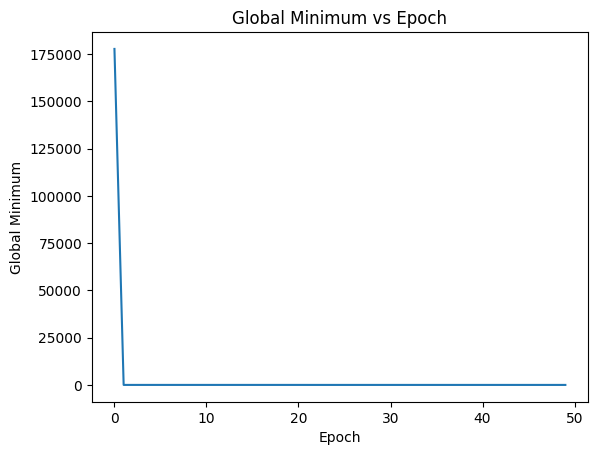

In [43]:
# plot globalminimum vs epoch
import matplotlib.pyplot as plt
plt.plot(globalminimum)
plt.xlabel('Epoch')
plt.ylabel('Global Minimum')
plt.title('Global Minimum vs Epoch')
plt.show()


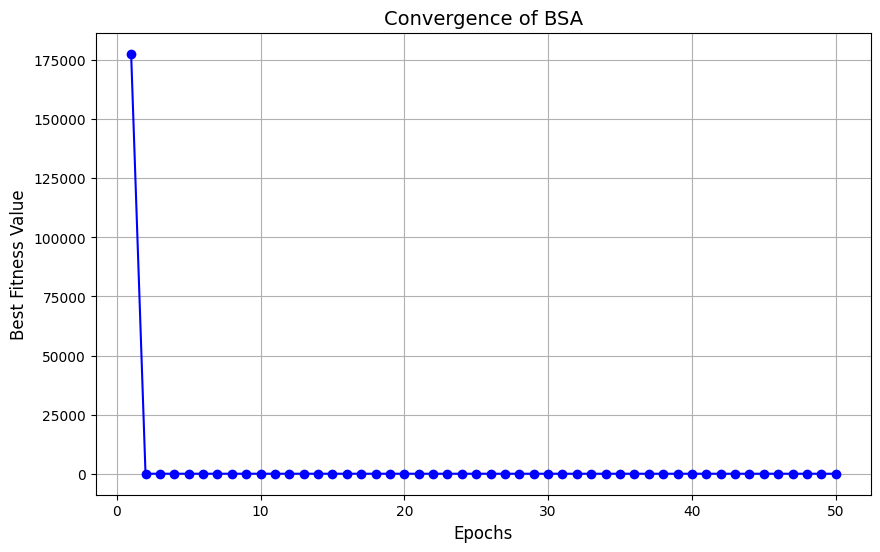

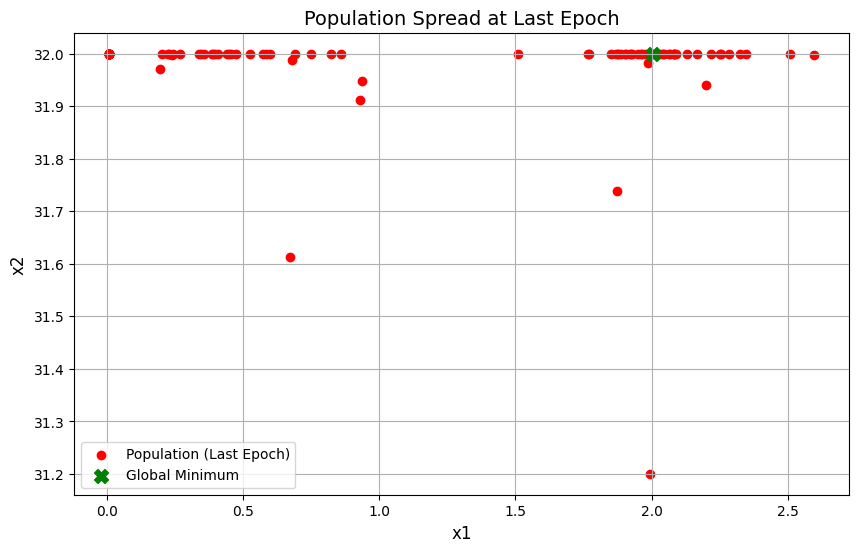

In [44]:
import matplotlib.pyplot as plt

# Plot convergence graph (best fitness value per epoch)
plt.figure(figsize=(10, 6))
plt.plot(range(1, epoch + 1), globalminimum, marker='o', linestyle='-', color='b')
plt.title("Convergence of BSA", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Best Fitness Value", fontsize=12)
plt.grid(True)
plt.show()

# Optional: Population spread visualization
# Visualize population in the search space at the last epoch
x1 = pop[:, 0]  # First dimension
x2 = pop[:, 1]  # Second dimension

plt.figure(figsize=(10, 6))
plt.scatter(x1, x2, c='r', label='Population (Last Epoch)')
plt.scatter(globalminimizer[0], globalminimizer[1], c='g', s=100, marker='X', label='Global Minimum')
plt.title("Population Spread at Last Epoch", fontsize=14)
plt.xlabel("x1", fontsize=12)
plt.ylabel("x2", fontsize=12)
plt.legend()
plt.grid(True)
plt.show()
